# Distribution B - Maximum Likelihood - Convergance Rate

In [1]:
import DistExampB as db
from matplotlib import pyplot as plot
import sympy as sp

import MleDist

from math import log, sqrt

from LocUtil import Grid1, SetSeed, UnZip
from LocMath import Interp1
from Map import LogRatio
from Sinc import SincApprox

## Code

In [13]:
def LogLike(pdfApprox, map_, sampX):
	sampZ = tuple(map_.Forward(x) for x in sampX)
	pdfEst = pdfApprox.InterpZ1(sampZ)
	
	result = sum(log(p) for p in pdfEst)
	return result

## Main

### Setup

In [3]:
import importlib
importlib.reload(MleDist)

<module 'MleDist' from 'F:\\Users\\Kenne.DESKTOP-BT6VROU\\Documents\\GitHub\\ManetSim\\CdfFit\\MleDist.py'>

In [4]:
dist = db.ExampB()

In [5]:
xSym = sp.Symbol('x')
zSym = sp.Symbol('z')

map_ = LogRatio(xSym,zSym, xRange=(0,2))
map_.forSym

log(x/(2 - x))

### Solve

In [6]:
nSamp = 100

In [7]:
seed = SetSeed()
print(f'seed = {seed}')

seed = 31532


In [8]:
sampX = tuple(dist.Sample() for _ in range(nSamp))

In [9]:
nSincRange = (10,)

In [10]:
import importlib
importlib.reload(MleDist)
import Sinc
importlib.reload(Sinc)

<module 'Sinc' from 'F:\\Users\\Kenne.DESKTOP-BT6VROU\\Documents\\GitHub\\ManetSim\\CdfFit\\Sinc.py'>

In [14]:
info = []

for nSinc in nSincRange:
	# compute MLE
	pdfApprox = MleDist.Sinc(sampX, map_, nSinc)
	
	# get errors of est
	rmsErr = MleDist.RmsDiff(pdfApprox, dist.Pdf, eps=1e-6)
	logLike = LogLike(pdfApprox, map_, sampX)
	
	# add annotation	
	# text = (
	# 	f'N = {nSinc}\n'
	# 	f'True Error = {rmsErr:.3f}\n'
	# 	f'Apparent Err. = {int(logLike):,d}'
	# )
	# DoPlot(sincPoint, map_, dist, sampX)
	
	# accumulate results
	info.append([nSinc, seed, rmsErr, logLike])

In [15]:
info

[[10,
  31532,
  (0.0030697522359952995, (-2.3462693098660976, 4.442213965122588, 11264)),
  -32.12191346489554]]

### Graph

Text(0.5, 0, 'n')

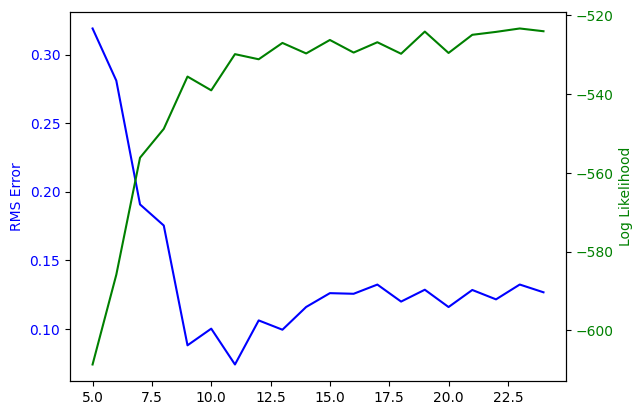

In [108]:
fix,ax0 = plot.subplots()

n,_,errTrue,errApp = UnZip(info)

ax0.plot(n,errTrue, c='blue')
ax0.set_ylabel('RMS Error', c='blue')
ax0.tick_params(axis='y', labelcolor='blue')

ax1 = ax0.twinx()
ax1.plot(n,errApp, c='green')
ax1.set_ylabel('Log Likelihood', c='green')
ax1.tick_params(axis='y', labelcolor='green')

plot.xlabel('n')